In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import random

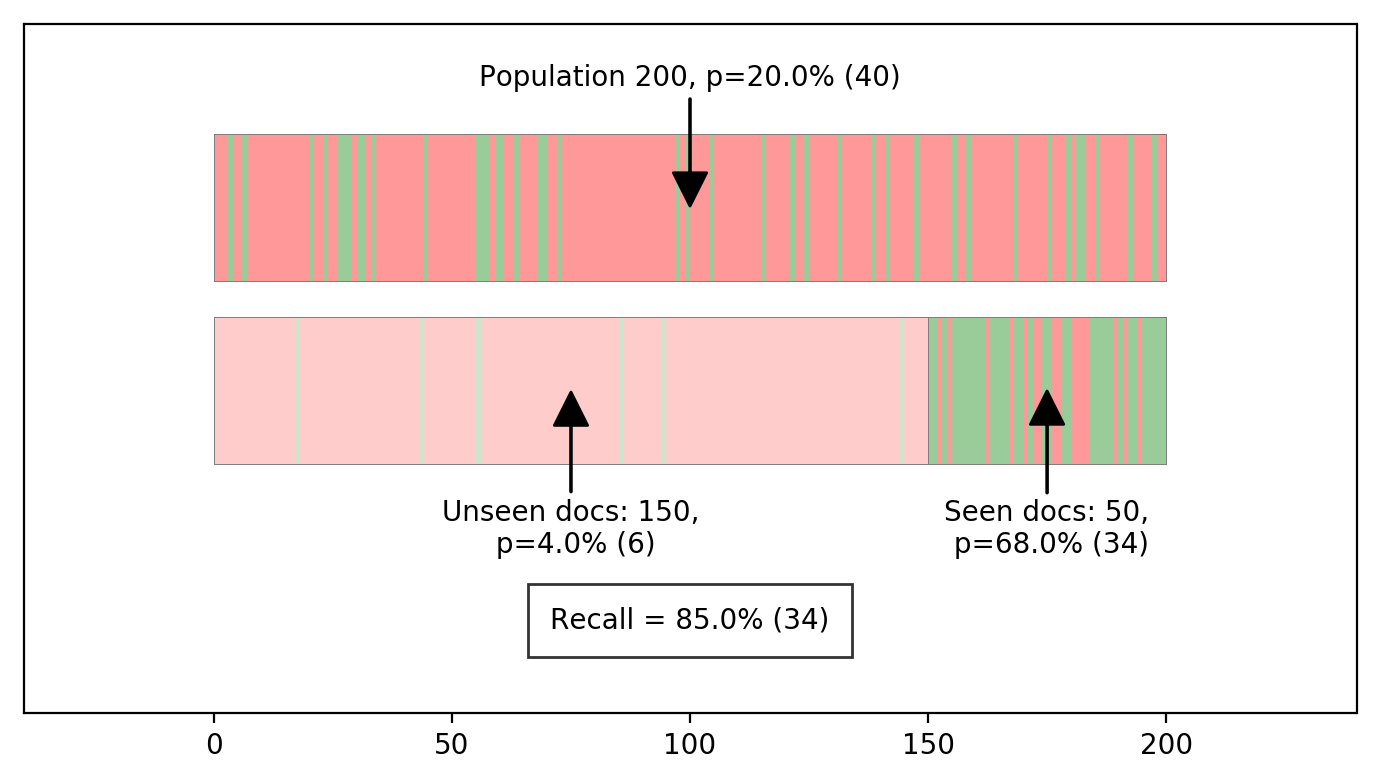

In [2]:



def rbars(n,p,ax,y,a,left=0):
    l = list(range(n))
    r = random.sample(l, int(n*p))
    for i in l:
        if i in r:
            c = "green"
        else:
            c = "red"
        ax.barh(
            y,1,left=i+left,
            color = c,
            alpha=a
        )
        ax.barh(
            y,n, left=left,
            color="None",
            edgecolor="grey",
            lw=0.2
        )
    return


p0 = 0.2 # Proportion of relevant studies in the whole population
p1 = 0.04 # Proportion of relevant studies in the unseen docs

N = 200 # Number of docs
n = 150 # Number of unseen docs


def calculate_proportions(p0, p1, n, N, ax):
    s = N - n # Number of seen docs
    p2 = (N*p0-n*p1)/s # proportion of relevant studies in seen docs

    recall = 1-p1/p0*n/N 
    
    p0n = round(n*p1)


    rbars(N,p0,ax,0,0.4)

    ax.annotate(
        f"Population {N}, p={p0:.1%} ({int(N*p0)})",(N/2,0),(N/2,0.66), ha="center", 
        arrowprops=dict(facecolor='black', shrink=0.01, width=0.2)
    )

    rbars(n, p1, ax, -1,0.2)

    ax.annotate(
        f"Unseen docs: {n},\n p={p1:.1%} ({int(n*p1)})",(n/2,-1),(n/2,-1.75), ha="center",va="center",
        arrowprops=dict(facecolor='black', shrink=0.01, width=0.2)
    )

    rbars(s, p2, ax, -1, 0.4, n)

    ax.annotate(
        f"Seen docs: {s},\n p={p2:.1%} ({int(s*p2)})",(s/2+n,-1),(s/2+n,-1.75), ha="center",va="center",
        arrowprops=dict(facecolor='black', width=0.2)
    )

    ax.text(N/2,-2.25, f"Recall = {recall:.1%} ({int(N*p0*recall)})",ha="center",va="center",
           bbox={"facecolor":"None",'alpha':0.8, 'pad':8}
           )

    #ax.barh(-1, n)

    plt.tick_params(
        axis='y',          
        which='both',     
        left=False,     
        right=False,       
        labelleft=False)

    plt.xlim(-N*0.2,N*1.2)
    plt.ylim(-2.75, 1)

    
fig, ax = plt.subplots(dpi=200,figsize=(7,4))


calculate_proportions(p0, p1, n, N, ax)


fig.tight_layout()

plt.savefig('images/proportions_1.png')

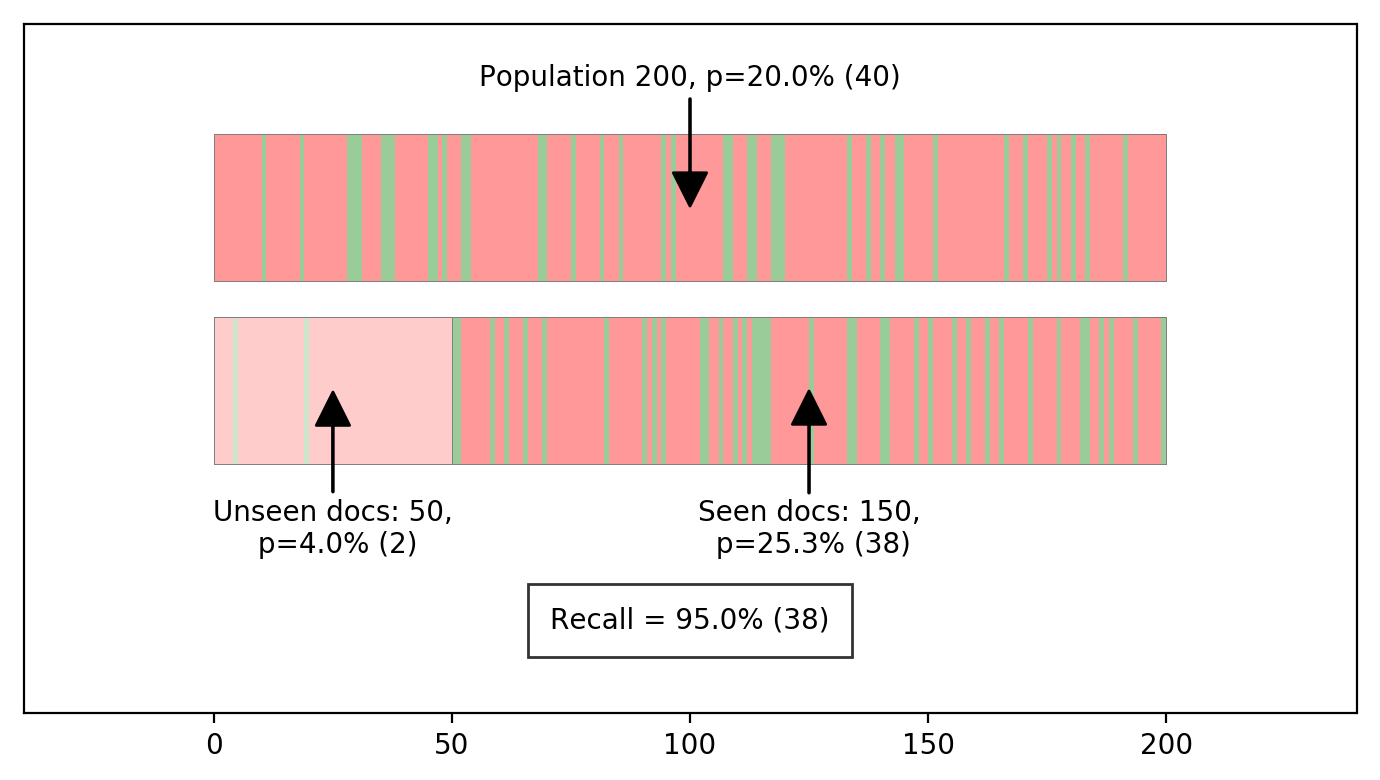

In [3]:
p0 = 0.2 #Proportion of relevant studies in the whole population
p1 = 0.04 # Proportion of relevant studies in the unseen docs

N = 200 # Number of docs
n = 50 # Number of unseen docs

fig, ax = plt.subplots(dpi=200,figsize=(7,4))


calculate_proportions(p0, p1, n, N, ax)

fig.tight_layout()

plt.savefig('images/proportions_2.png')

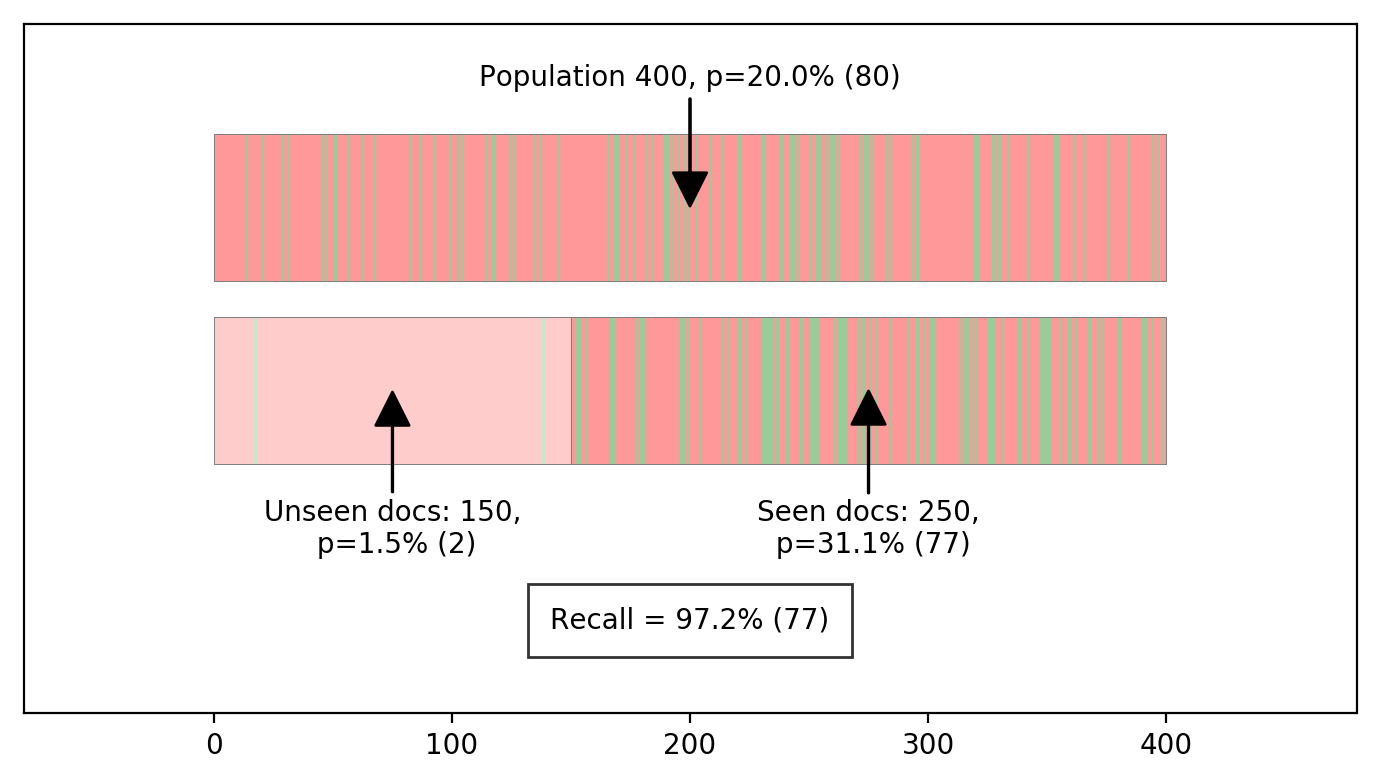

In [4]:
p0 = 0.2 #Proportion of relevant studies in the whole population
p1 = 0.015 # Proportion of relevant studies in the unseen docs

N = 400 # Number of docs
n = 150 # Number of unseen docs

fig, ax = plt.subplots(dpi=200,figsize=(7,4))

calculate_proportions(p0, p1, n, N, ax)


fig.tight_layout()
plt.savefig('images/proportions_3.png')

In [5]:
import scipy.stats as st
import numpy as np

X = 1
n = 150

p = X/n




def ci_ac(X, n, a):
    def get_k(a):
        a = (1-(1-a)/2)
        return st.norm.ppf(a)

    k = get_k(a)

    X_tilde = X + k**2/2
    n_tilde = n + k**2
    p_tilde = X_tilde / n_tilde
    q_tilde = 1-p_tilde

    ci = k* np.sqrt(p_tilde*q_tilde/n_tilde) 

    return p_tilde, ci

p_tilde, ci = ci_ac(X, n, 0.95)
print(f'p = {p}')

#print(X)
#print(X_tilde)
#print(n_tilde)

print(f'p_tilde = {p_tilde} +- {ci}')

#print(ci)

p = 0.006666666666666667
p_tilde = 0.01898532055491779 +- 0.021565429718406314


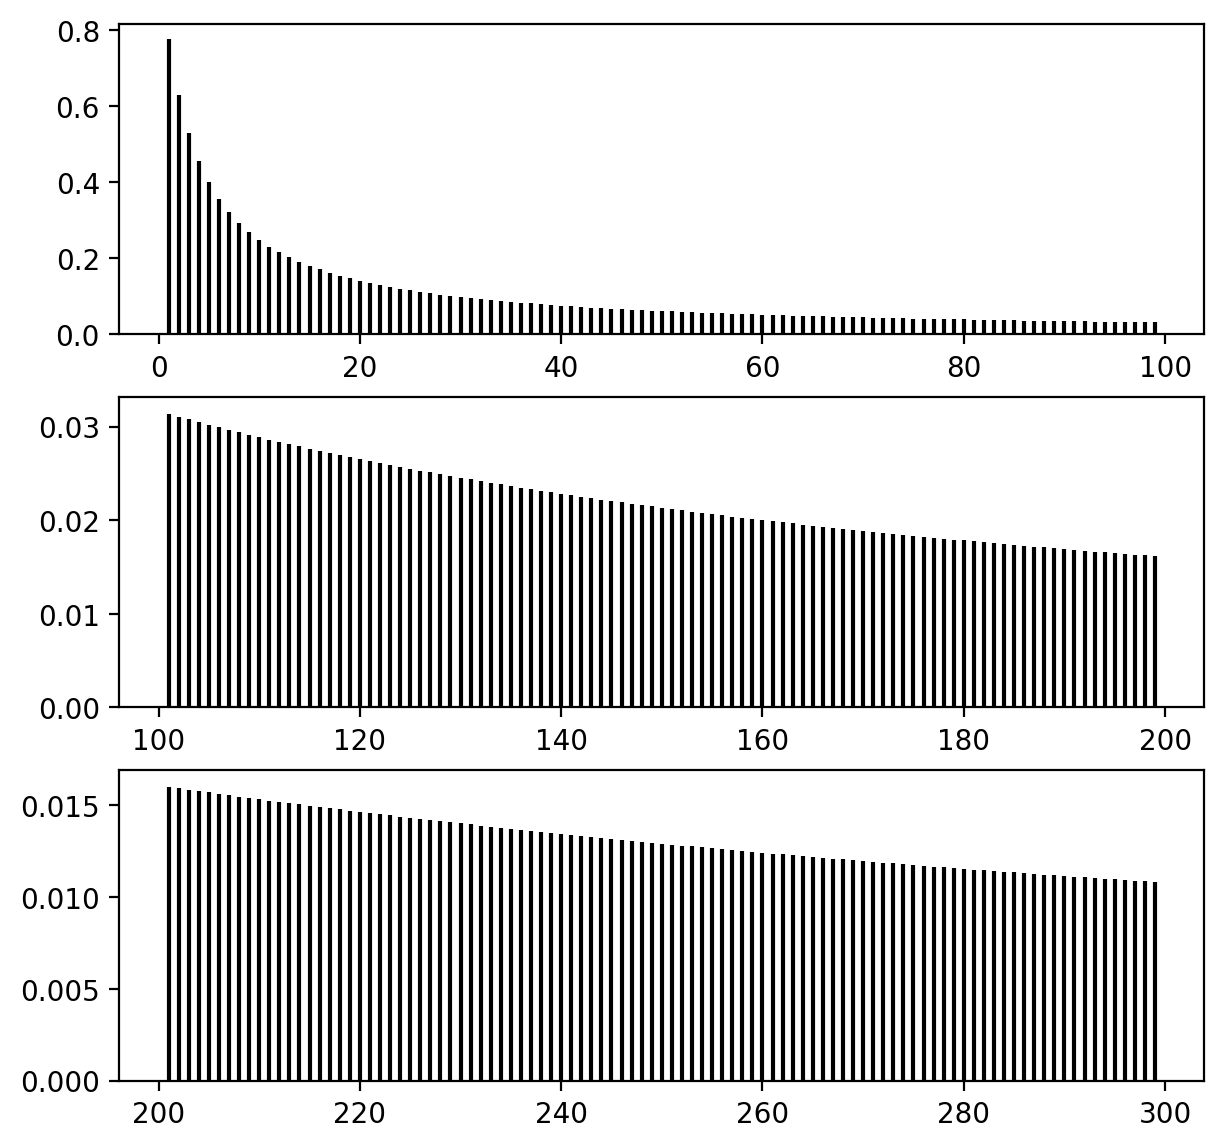

In [6]:
X = 0
fig, axs = plt.subplots(3,figsize=(7,7),dpi=200)

for i in [0,1,2]:
    for n in range((i*100)+1,(i+1)*100):
        ax = axs[i]
        p_tilde, ci = ci_ac(X, n, 0.90)
        ax.errorbar(n, p_tilde, ci, color="black")
        ax.set_ylim(0)

    

/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


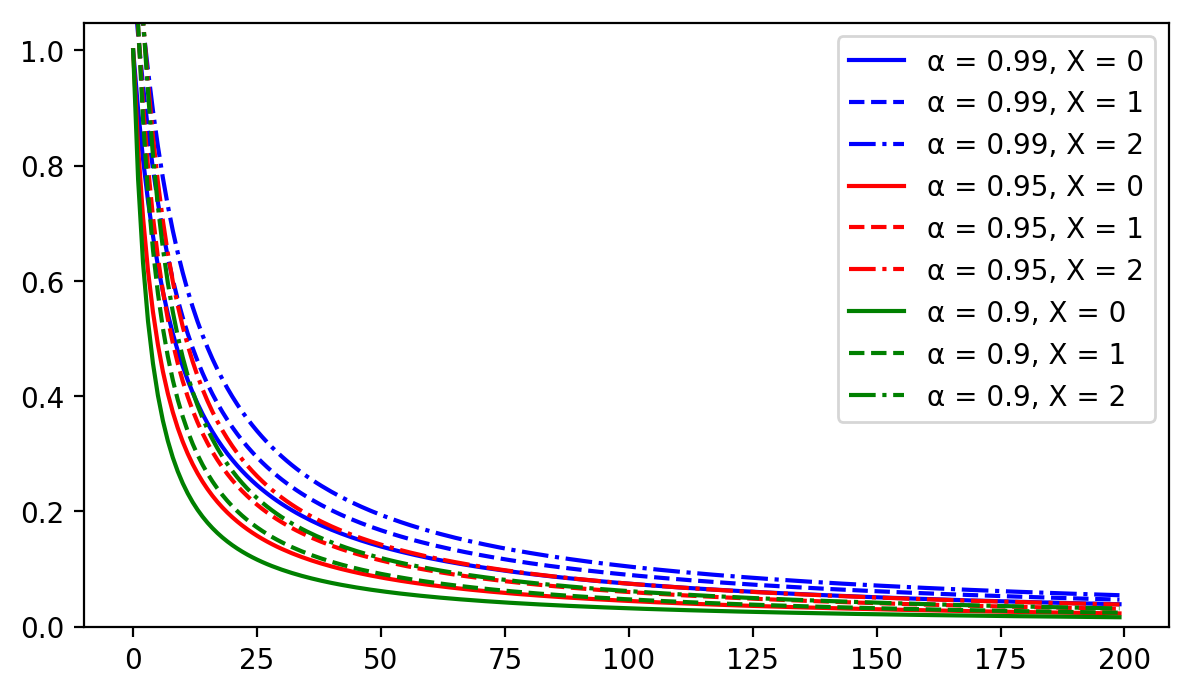

In [7]:
X = 1
fig, ax = plt.subplots(figsize=(7,4),dpi=200)

cmap = {
    0.99: "blue",
    0.95: "red",
    0.9: "green"
}
lmap = {
    0: "-",
    1: "--",
    2: "-."
}

for a in [0.99,0.95,0.9]:
    for X in [0,1,2]:
        max_values = [x[0] + x[1] for x in [ci_ac(X, n, a) for n in range(200)]]
        ax.plot(max_values, label=f"{chr(945)} = {a}, X = {X}",c=cmap[a],linestyle=lmap[X])
        ax.set_ylim(0)
        
ax.legend()

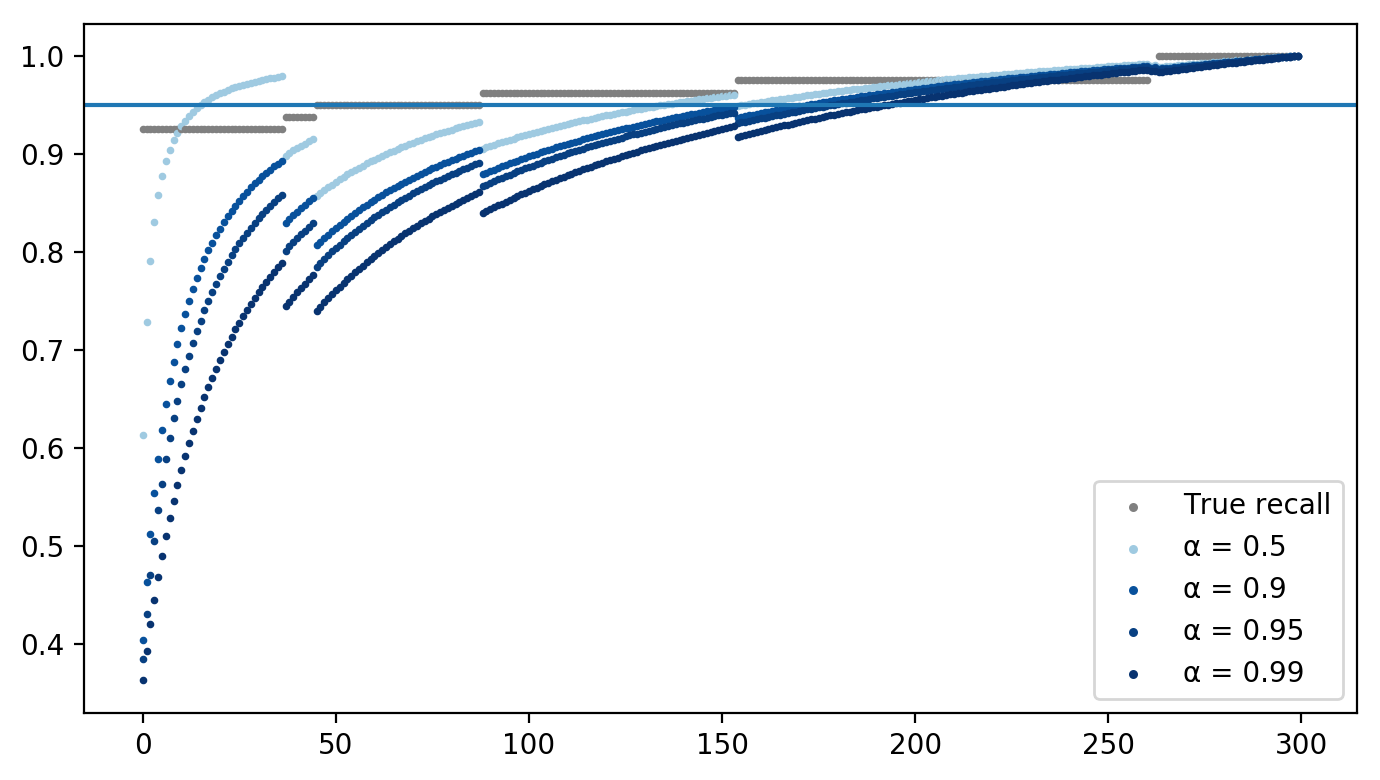

In [8]:
fig, ax = plt.subplots(figsize=(7,4),dpi=200)

p0 = 0.2 #Proportion of relevant studies in the whole population
p1 = 0.02 # Proportion of relevant studies in the unseen docs

N = 400 # Number of docs
n = 300 # Number of unseen docs

s = N - n # Number of seen docs
p2 = (N*p0-n*p1)/s # proportion of relevant studies in seen docs

relevant_seen = s*p2


if n*p1 % 1 == 0:
    sample = [1]*int(n*p1) + [0]*int(n*(1-p1))
else:
    print("not real integer")

random.shuffle(sample)

def estimate_total_recall(max_value, n):
    s = N - n # Number of seen docs
    
    p2 = (N*p0-n*p1-X)/s # proportion of relevant studies in seen docs
    
    p0_hat = (p_tilde*n + p2*s)/N  # estimated value of p for all doc    

    min_recall = 1-p_tilde/p0_hat*n/N 
    return min_recall, p2

cmap = {
    0.99: "blue",
    0.95: "red",
    0.9: "green",
    0.5: "black"
} 

cmap = plt.cm.Blues
norm = matplotlib.colors.Normalize(vmin=0.2, vmax=1)

ax.scatter([],[], c = "grey",s=5, label="True recall")
for a in [0.5, 0.9, 0.95, 0.99]:
    ax.scatter([],[],c=cmap(norm(a)),label=f"{chr(945)} = {a}",s=5)
    n_remaining = n
    X = 0
    for i,x in enumerate(sample):
        X += x
        n_remaining -= 1 # reduce number of unseen docs by one

        p_tilde, ci = ci_ac(X, i+1, a)
        max_value = p_tilde+ci # Maximum (with ci) estimated value of p for unseen docs
        min_recall, p2 = estimate_total_recall(max_value, n_remaining)
        
        recall = (relevant_seen+X)/(N*p0)

        
        if a==0.5:
            ax.scatter(i, recall, c = "grey",s=3)
    
        ax.scatter(i, min_recall, c=cmap(norm(a)), s=3)
    
ax.axhline(0.95)
    
ax.legend()
fig.tight_layout()
plt.savefig('images/sample_recall.png')


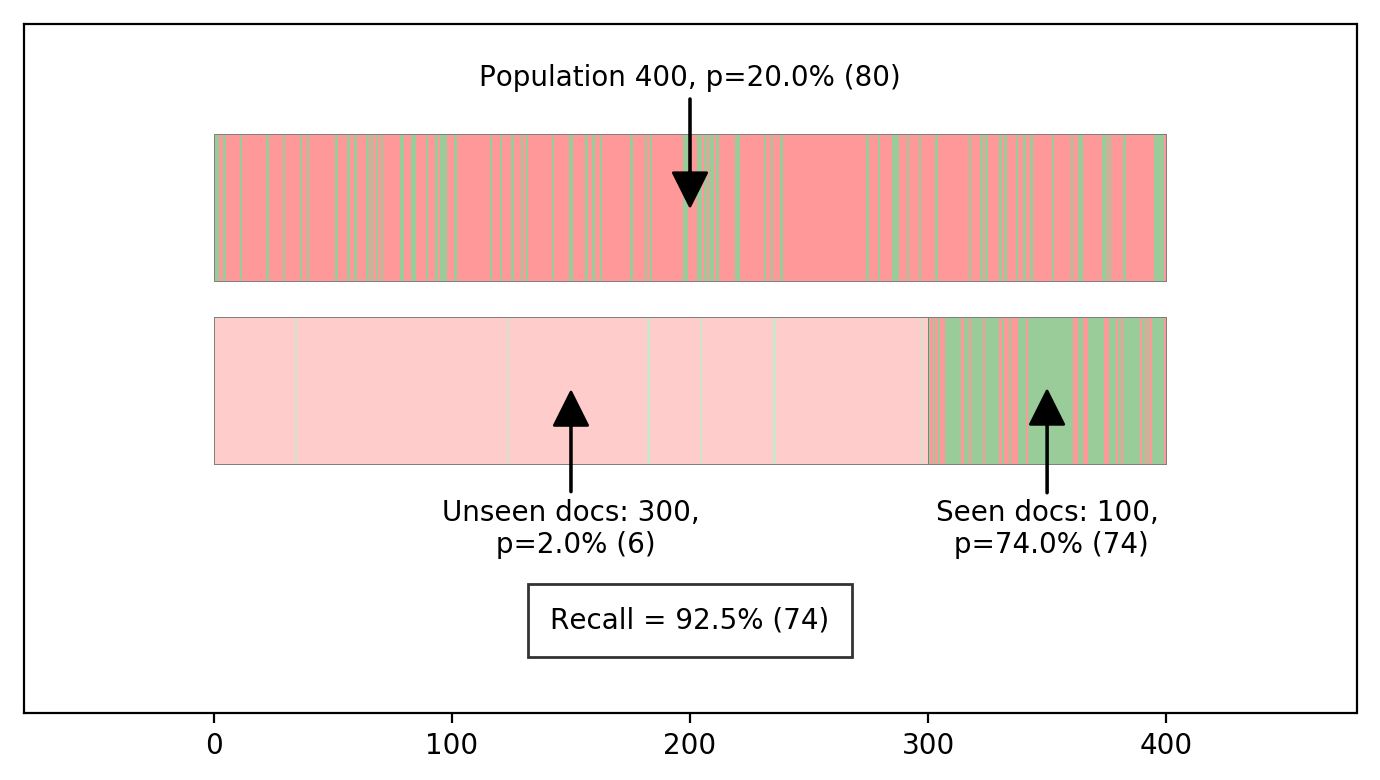

In [9]:
fig, ax = plt.subplots(dpi=200,figsize=(7,4))
calculate_proportions(p0, p1, n, N, ax)
fig.tight_layout()

plt.savefig('images/sample_status.png')

In [10]:
p_tilde, ci = ci_ac(1, 100, 0.95)

print(f'p = {p}')
print(f'p_tilde = {p_tilde} +- {ci}')

print(p_tilde+ci)

p = 0.006666666666666667
p_tilde = 0.028126814121422983 +- 0.03180004776042731
0.05992686188185029


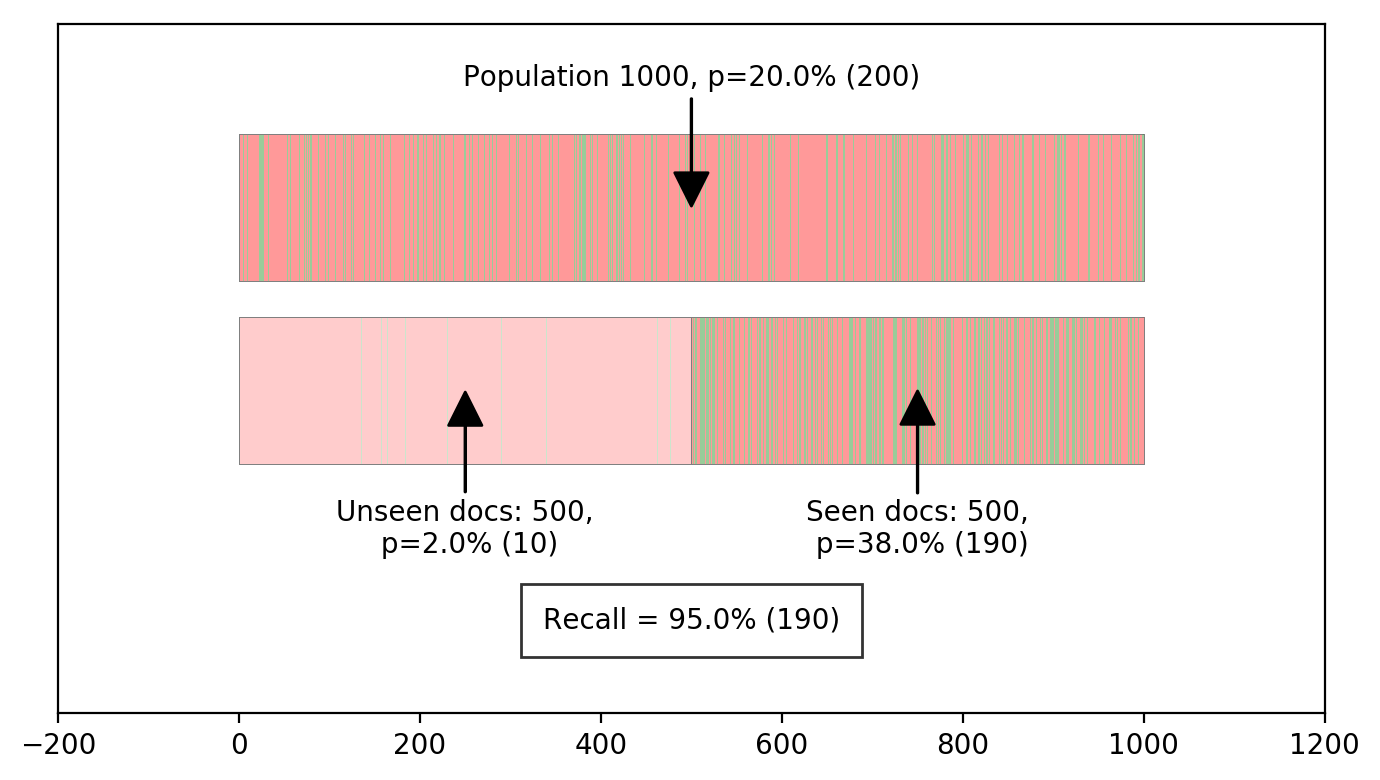

In [27]:
p0 = 0.2 #Proportion of relevant studies in the whole population
p1 = 0.02 # Proportion of relevant studies in the unseen docs

N = 1000 # Number of docs
n = 500 # Number of unseen docs

s = N - n # Number of seen docs
p2 = (N*p0-n*p1)/s # proportion of relevant studies in seen docs

relevant_seen = s*p2

fig, ax = plt.subplots(dpi=200,figsize=(7,4))
calculate_proportions(p0, p1, n, N, ax)
fig.tight_layout()

plt.savefig('images/sample_status_2.png')


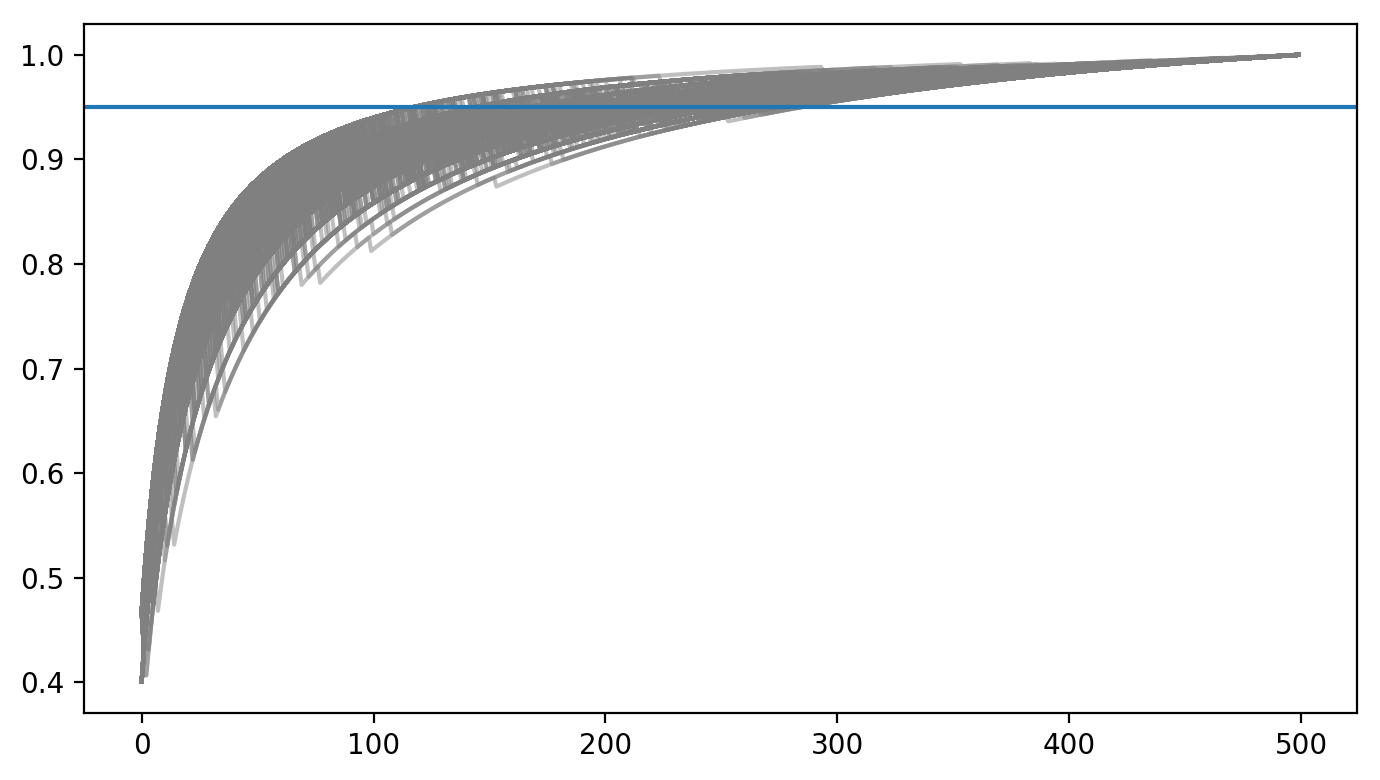

In [29]:
fig, ax = plt.subplots(dpi=200,figsize=(7,4))

if n*p1 % 1 == 0:
    sample = [1]*int(n*p1) + [0]*int(n*(1-p1))
else:
    print("not real integer")

def estimate_total_recall(max_value, n):
    s = N - n # Number of seen docs
    
    p2 = (N*p0-n*p1-X)/s # proportion of relevant studies in seen docs
    
    p0_hat = (p_tilde*n + p2*s)/N  # estimated value of p for all doc    

    min_recall = 1-p_tilde/p0_hat*n/N 
    return min_recall, p2

cmap = {
    0.99: "blue",
    0.95: "red",
    0.9: "green",
    0.5: "black"
} 

cmap = plt.cm.Blues
norm = matplotlib.colors.Normalize(vmin=0.2, vmax=1)

for j in range(2000):
    random.shuffle(sample)
    n_remaining = n
    X = 0
    xs = []
    ys = []
    for i,x in enumerate(sample):
        X += x
        n_remaining -= 1 # reduce number of unseen docs by one

        p_tilde, ci = ci_ac(X, i+1, a)
        max_value = p_tilde+ci # Maximum (with ci) estimated value of p for unseen docs
        min_recall, p2 = estimate_total_recall(max_value, n_remaining)
        xs.append(i)
        ys.append(min_recall)
        
    
    ax.plot(xs, ys, c="grey",alpha=0.5)
    
ax.axhline(0.95)
    
fig.tight_layout()
plt.savefig('images/sample_recall_2.png')